# UMAP For Dimensionality Reduction

## Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=ee930c58441315665b143a16298195a9e6d10ee8e275f7664c83920fb5353004
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
# Importing necessary libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
iris_data = pd.read_csv('/content/drive/MyDrive/DM-Assignment-Dataset/Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing

In [8]:
# Dropping the 'species' column for dimensionality reduction
features = iris_data.drop('Species', axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Applying UMAP

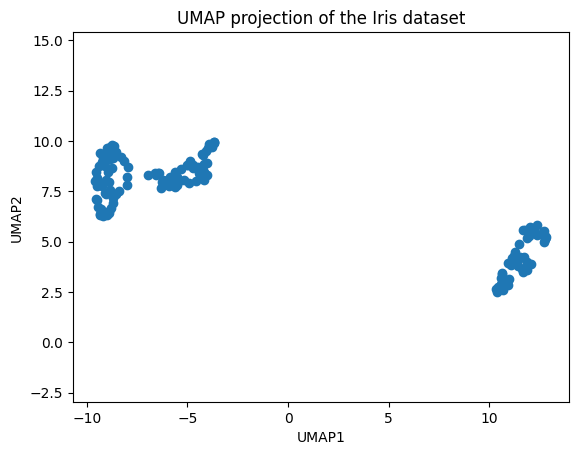

In [9]:
# Applying UMAP
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_features)

# Visualizing the results
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## Clustering on Reduced Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


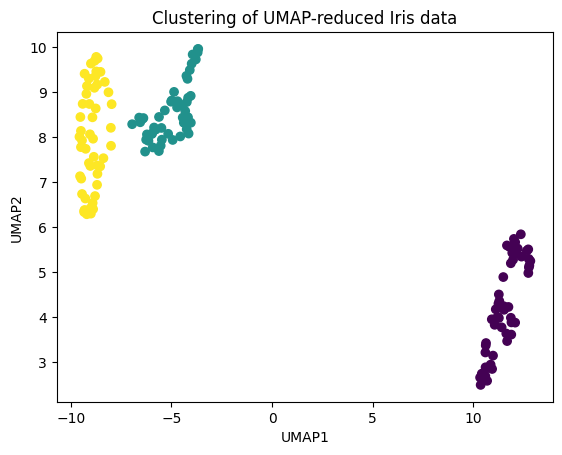

In [10]:
# Importing clustering library
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embedding)

# Visualizing the clustering results
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of UMAP-reduced Iris data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

## Classification Using Reduced Features

In [12]:
# Importing classification libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preparing data for classification
X_train, X_test, y_train, y_test = train_test_split(embedding, iris_data['Species'], test_size=0.3, random_state=42)


In [13]:
# Training a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predicting and evaluating the classifier
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 1.0


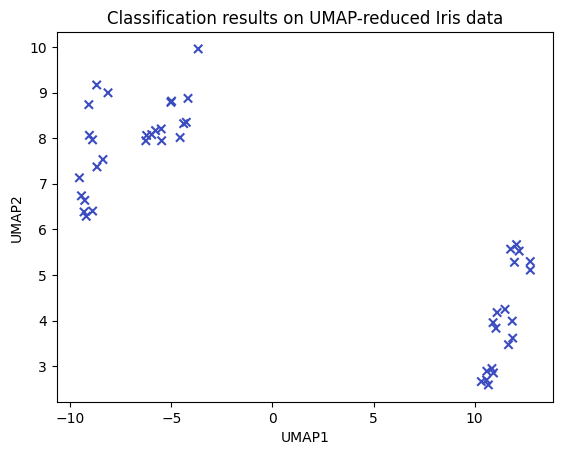

In [14]:
# Visualizing classification results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test==predictions, cmap='coolwarm', marker='x')
plt.title('Classification results on UMAP-reduced Iris data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()